In [8]:
#Install these libraries if you dont have
!pip install xgboost
!pip install graphviz

!pip install pydotplus
!pip install keras
!pip install tensorflow==2.0.0

  Using cached tensorflow-2.1.0-cp36-cp36m-win_amd64.whl (355.9 MB)


In [2]:
import numpy as np
import pandas as pd

from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
#Set Seed
np.random.seed(2020)

In [4]:
rain=pd.read_csv('weatherAUS.csv',parse_dates=['Date'])

In [5]:
print('Size of weather data frame is :',rain.shape)

Size of weather data frame is : (142193, 24)


In [6]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [8]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


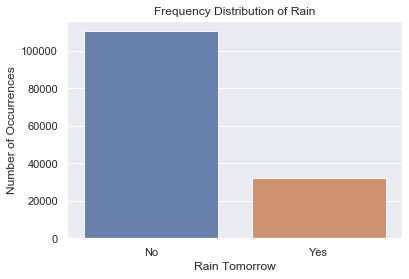

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [9]:
class_count1 = rain['RainTomorrow'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count1.index, class_count1.values, alpha=0.9)
plt.title('Frequency Distribution of Rain')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rain Tomorrow', fontsize=12)
plt.show()
print(rain['RainTomorrow'].value_counts())

In [10]:
#missing data
total = rain.isnull().sum().sort_values(ascending=False)
percent = (rain.isnull().sum()/rain.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


In [11]:
rain = rain.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am',"RISK_MM"],axis=1)
rain.shape

(142193, 19)

In [12]:
rain = rain.dropna(how='any')
rain.shape

(112925, 19)

In [13]:
from scipy import stats
z = np.abs(stats.zscore(rain._get_numeric_data()))
print(z)
rain= rain[(z < 3).all(axis=1)]
print(rain.shape)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]
(107868, 19)


In [14]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000
mean,12.564709,23.653387,1.482925,39.773733,14.692504,19.064199,67.381346,50.343930,1017.754662,1015.345157,17.399578,22.143784
std,6.251908,6.917637,3.904974,11.967334,7.663969,8.017655,18.511889,20.404615,6.733285,6.691289,6.323997,6.766673
min,-6.000000,4.100000,0.000000,7.000000,2.000000,2.000000,11.000000,0.000000,996.400000,994.200000,-1.100000,3.200000
25%,8.000000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.600000,12.700000,17.000000
50%,12.300000,23.200000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.200000,17.000000,21.600000
75%,17.100000,28.700000,0.600000,48.000000,20.000000,24.000000,81.000000,64.000000,1022.300000,1019.900000,22.000000,26.900000
max,31.400000,44.600000,28.000000,80.000000,39.000000,44.000000,100.000000,100.000000,1038.500000,1035.900000,36.500000,42.600000


In [15]:
rain['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [16]:
cols=["Pressure9am","Pressure3pm","WindGustSpeed","Humidity3pm","Temp3pm",
      "WindSpeed3pm","Humidity9am","Rainfall","WindSpeed9am","Temp9am","MinTemp","MaxTemp"]
rain2=rain[cols]
rain2.shape

(107868, 12)

In [17]:
# #Checeking for Multicollinearity


def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(rain2, 40))

Top Absolute Correlations
Temp3pm        MaxTemp          0.984985
Pressure9am    Pressure3pm      0.959700
Temp9am        MinTemp          0.901086
               MaxTemp          0.883554
Temp3pm        Temp9am          0.859295
MinTemp        MaxTemp          0.731850
Temp3pm        MinTemp          0.707920
Humidity3pm    Humidity9am      0.675005
WindGustSpeed  WindSpeed3pm     0.660688
               WindSpeed9am     0.556157
Humidity3pm    Temp3pm          0.546416
Humidity9am    MaxTemp          0.517233
Temp3pm        Humidity9am      0.511147
Humidity3pm    MaxTemp          0.496843
Pressure3pm    Temp9am          0.482068
               MinTemp          0.470082
Humidity9am    Temp9am          0.468138
WindSpeed3pm   WindSpeed9am     0.458910
Pressure9am    MinTemp          0.457125
Pressure3pm    MaxTemp          0.447246
Pressure9am    Temp9am          0.430996
Pressure3pm    Temp3pm          0.416783
Pressure9am    WindGustSpeed    0.415008
Pressure3pm    WindGustSpeed   

In [18]:
rain2[rain2.columns[:]].corr()['Rainfall'][:]

Pressure9am     -0.170271
Pressure3pm     -0.103090
WindGustSpeed    0.129801
Humidity3pm      0.302529
Temp3pm         -0.164667
WindSpeed3pm     0.057727
Humidity9am      0.293940
Rainfall         1.000000
WindSpeed9am     0.070536
Temp9am         -0.060406
MinTemp          0.060468
MaxTemp         -0.159865
Name: Rainfall, dtype: float64

In [19]:
rain3= rain.set_index('Date')

In [20]:
rain3['month'] = rain3.index.month
rain3['weekday'] = rain3.index.weekday
rain3['week'] = rain3.index.week

In [21]:
rain3['year'] = rain3.index.year

In [22]:
def yearly(x,df=rain3):
    return df.groupby('year')[x].mean()

In [23]:
def daily(x,df=rain3):
    return df.groupby('weekday')[x].mean()
def monthly_daily(x,df=rain3):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

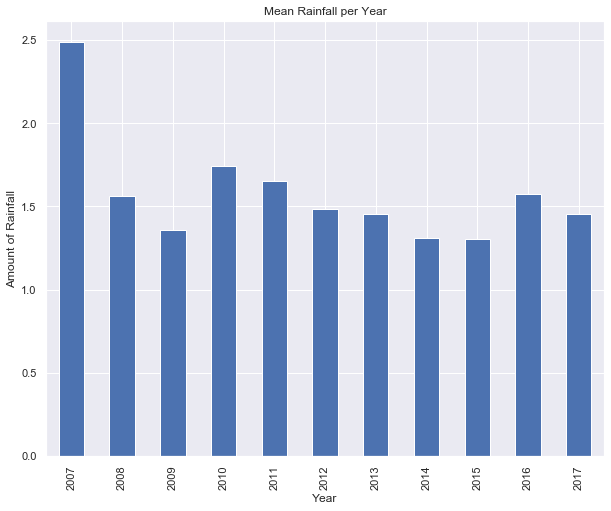

In [24]:
# Plot of Mean Rainfall per Day of Week
yearly('Rainfall').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0,11, 1)) 
labels = "2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017".split()
plt.xlabel('Year')
plt.ylabel('Amount of Rainfall')
plt.title('Mean Rainfall per Year')
plt.xticks(ticks, labels);

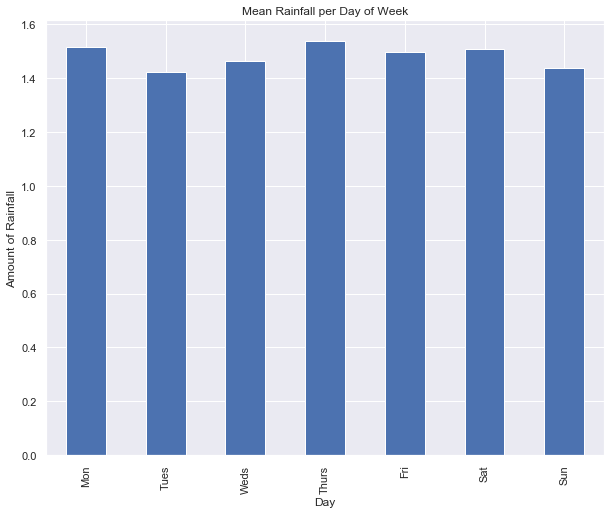

In [25]:
# Plot of Mean Rainfall per Day of Week
daily('Rainfall').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Amount of Rainfall')
plt.title('Mean Rainfall per Day of Week')
plt.xticks(ticks, labels);

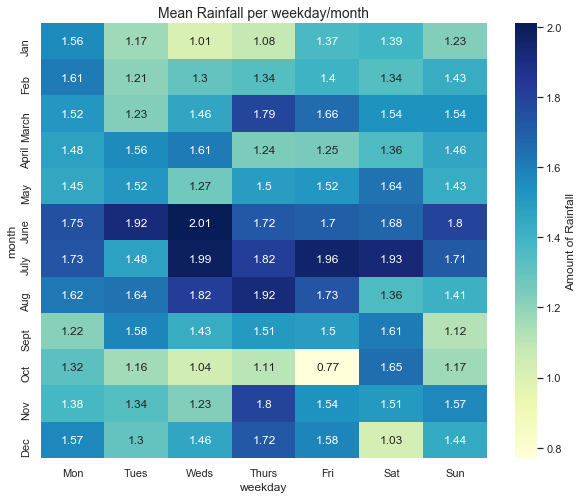

In [26]:
# Heatmap: Mean Rainfall per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Rainfall').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="Jan Feb March April May June July Aug Sept Oct Nov Dec".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Amount of Rainfall'}).set_title("Mean Rainfall per weekday/month").set_fontsize('14')

plt.show()

In [27]:
def location(x,df=rain3):
    return df.groupby('Location')[x].mean()


In [28]:
loc_count = rain['Location'].value_counts()

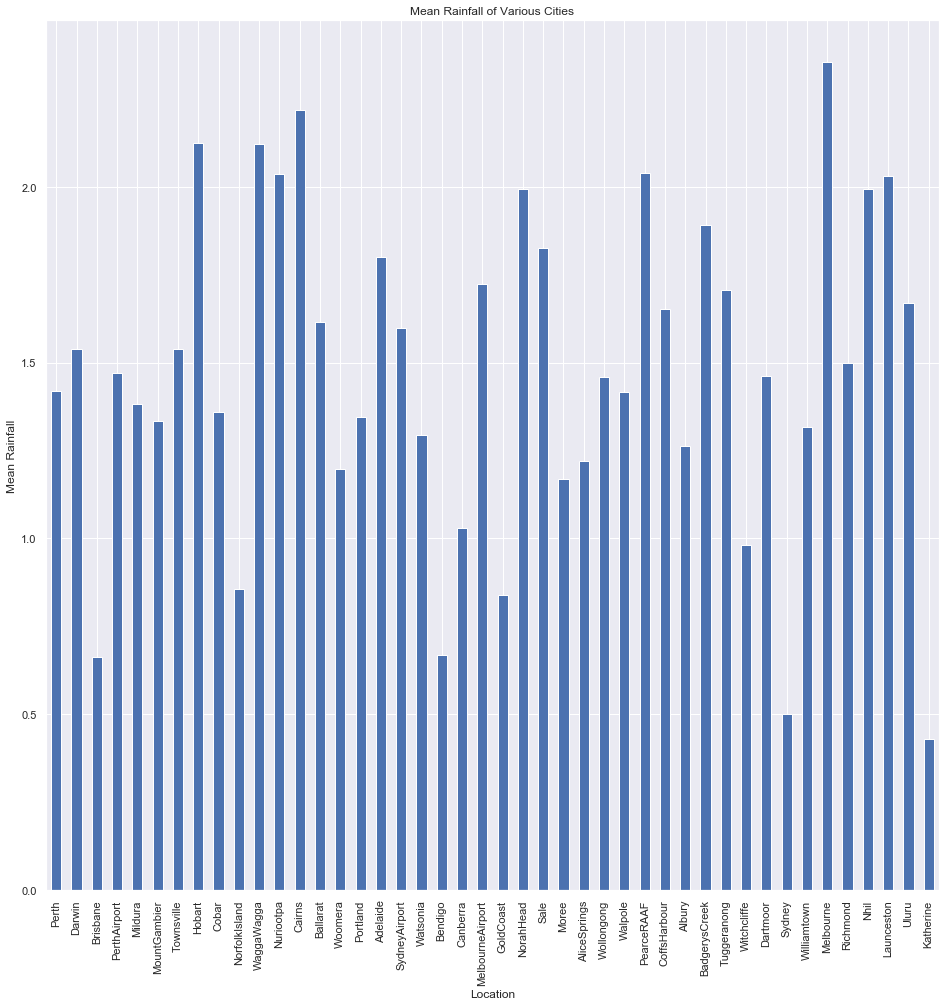

In [29]:
location('Rainfall').plot(kind = 'bar', figsize=(16,16))
ticks = list(range(0, len(rain['Location'].unique().tolist()), 1)) 
plt.xlabel('Location')
plt.ylabel('Mean Rainfall')
plt.title('Mean Rainfall of Various Cities')
plt.xticks(ticks, loc_count.index);

In [30]:
#See unique values and convert them to int using pd.getDummies()
r=rain
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    
    print(np.unique(rain[col]))
# transform the categorical columns
r = pd.get_dummies(rain, columns=categorical_columns)
r.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,1,0,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,1,0,0,0,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
df=r.drop(columns=['Date','Location'],axis=1)
df.shape
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Scaling
from sklearn import preprocessing 
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df=df.sample(n=10000)

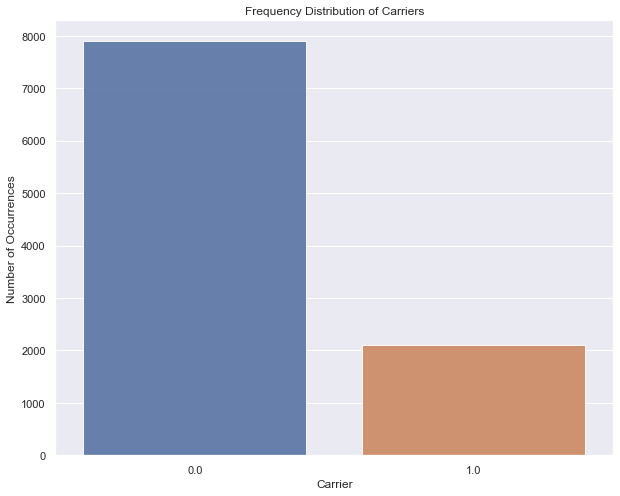

0.0    7897
1.0    2103
Name: RainTomorrow, dtype: int64


In [34]:
class_count = df['RainTomorrow'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()
print(df['RainTomorrow'].value_counts())

In [35]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.498556,0.484471,0.053165,0.447033,0.339143,0.404855,0.632565,0.503764,0.508419,0.508115,...,0.056500,0.057500,0.065200,0.069700,0.071700,0.059400,0.065700,0.057700,0.051900,0.051500
std,0.166079,0.170679,0.140282,0.162874,0.206623,0.192576,0.208458,0.205427,0.160586,0.161768,...,0.230896,0.232807,0.246891,0.254653,0.258003,0.236384,0.247769,0.233187,0.221836,0.221026
min,0.013369,0.019753,0.000000,0.027397,0.000000,0.000000,0.000000,0.010000,0.002375,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377005,0.353086,0.000000,0.328767,0.189189,0.261905,0.505618,0.350000,0.399050,0.395683,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494652,0.471605,0.000000,0.438356,0.297297,0.404762,0.640449,0.510000,0.505938,0.505995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.620321,0.607407,0.021429,0.561644,0.459459,0.523810,0.786517,0.650000,0.617577,0.618705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.989305,0.995062,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997625,0.995204,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training and test split

In [36]:
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split( 
                        X,y, 
                test_size = 0.25, random_state = 101)

In [38]:
trainValues = []
testValues = []

# KNN - K nearest neighbours

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.8730666666666667
Test Data 0.7824

Classification Report

               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1945
         1.0       0.52      0.28      0.36       555

    accuracy                           0.78      2500
   macro avg       0.67      0.60      0.62      2500
weighted avg       0.75      0.78      0.76      2500

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


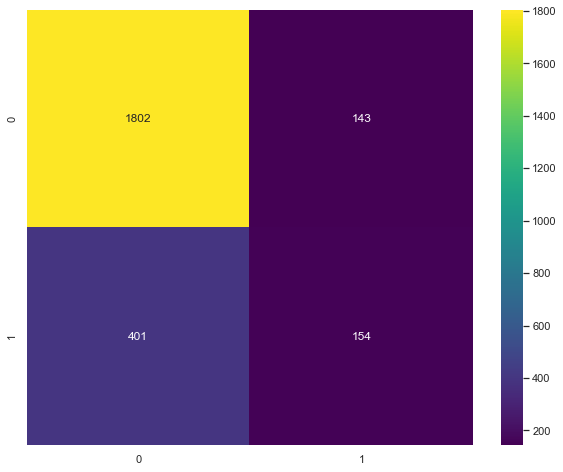

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train) 
predictionsknn3Test = knn.predict(X_test)
predictionsknn3Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn3Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn3Test))
trainValues.append(metrics.accuracy_score(y_train,predictionsknn3Train))
testValues.append(metrics.accuracy_score(y_test,predictionsknn3Test))
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn3Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn3Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.8448
Test Data 0.7996

Classification Report

               precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1945
         1.0       0.62      0.25      0.35       555

    accuracy                           0.80      2500
   macro avg       0.72      0.60      0.62      2500
weighted avg       0.77      0.80      0.76      2500

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


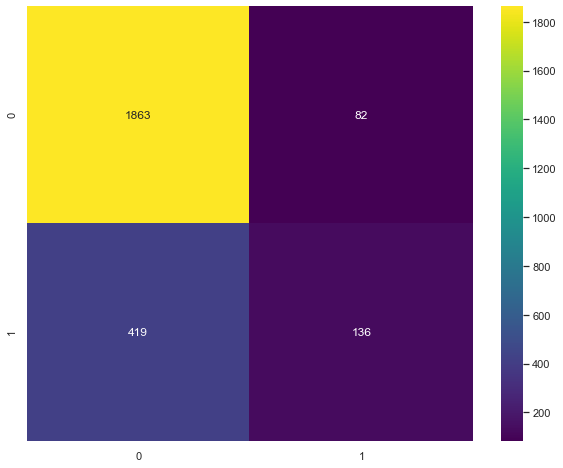

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
predictionsknn5Test = knn.predict(X_test)
predictionsknn5Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn5Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn5Test))
trainValues.append(metrics.accuracy_score(y_train,predictionsknn5Train))
testValues.append(metrics.accuracy_score(y_test,predictionsknn5Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn5Test))  
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn5Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.8257333333333333
Test Data 0.7932

Classification Report

               precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      1945
         1.0       0.65      0.15      0.24       555

    accuracy                           0.79      2500
   macro avg       0.72      0.56      0.56      2500
weighted avg       0.77      0.79      0.74      2500

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


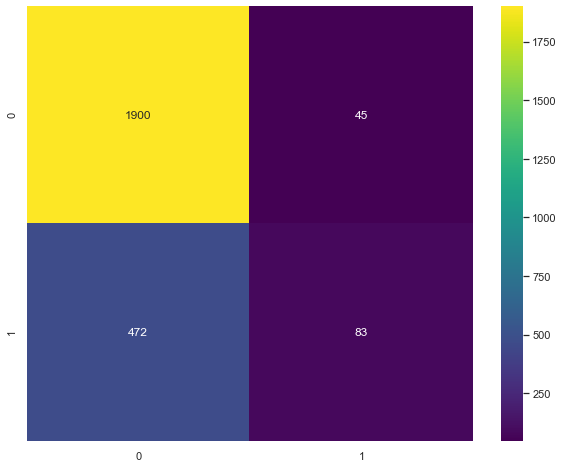

In [41]:
knn = KNeighborsClassifier(n_neighbors=9)  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
trainValues.append(metrics.accuracy_score(y_train,predictionsknn9Train))
testValues.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test))  
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

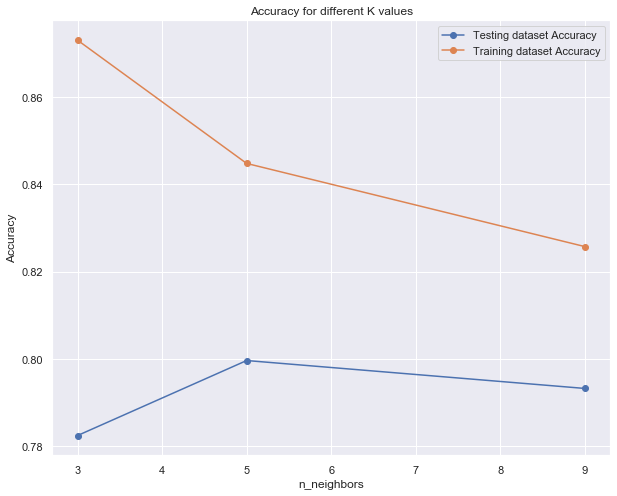

In [42]:
# Generate plot 
plt.plot([3, 5, 9], testValues, 'o-', label = 'Testing dataset Accuracy') 
plt.plot([3, 5, 9], trainValues, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different K values")
plt.show() 

In [43]:
trainValuesDist = []
testValuesDist = []

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.8448
Test Data 0.7996

Classification Report

               precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1945
         1.0       0.62      0.25      0.35       555

    accuracy                           0.80      2500
   macro avg       0.72      0.60      0.62      2500
weighted avg       0.77      0.80      0.76      2500

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


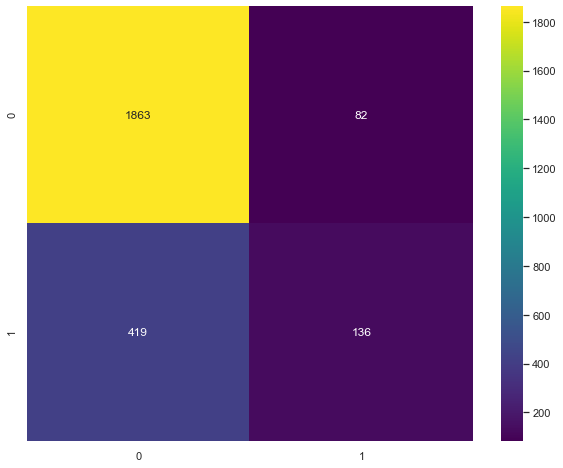

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
trainValuesDist.append(metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
testValuesDist.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.8496
Test Data 0.804

Classification Report

               precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1945
         1.0       0.64      0.26      0.37       555

    accuracy                           0.80      2500
   macro avg       0.73      0.61      0.63      2500
weighted avg       0.78      0.80      0.77      2500

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


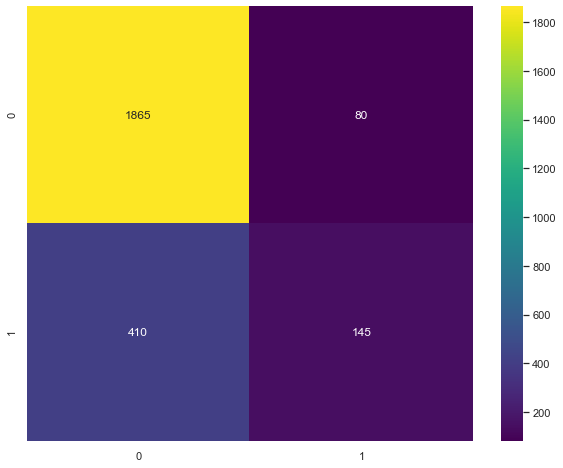

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "manhattan")  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
trainValuesDist.append(metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
testValuesDist.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.8342666666666667
Test Data 0.7872

Classification Report

               precision    recall  f1-score   support

         0.0       0.81      0.96      0.87      1945
         1.0       0.56      0.19      0.29       555

    accuracy                           0.79      2500
   macro avg       0.68      0.57      0.58      2500
weighted avg       0.75      0.79      0.74      2500

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


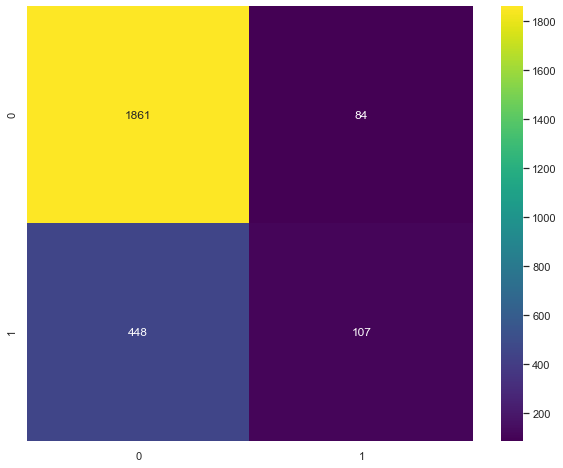

In [46]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "hamming")  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
trainValuesDist.append(metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
testValuesDist.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

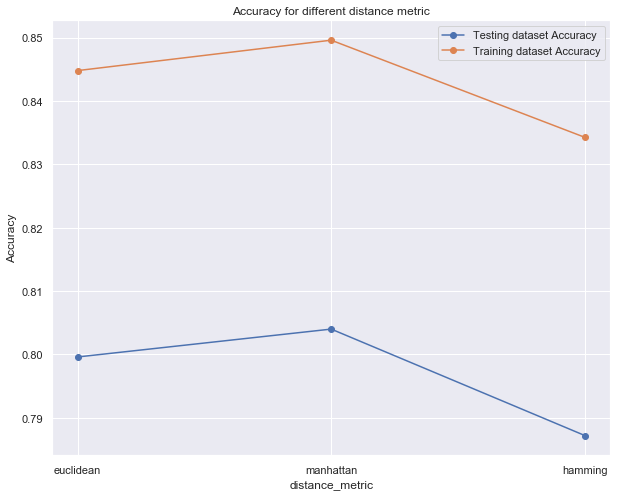

In [47]:
# Generate plot 
plt.plot(['euclidean', 'manhattan', 'hamming'], testValuesDist, 'o-', label = 'Testing dataset Accuracy') 
plt.plot(['euclidean', 'manhattan', 'hamming'], trainValuesDist, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('distance_metric') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different distance metric")
plt.show()

In [48]:
trainValuesLayers = []
testValuesLayers = []

# Artificial Neural network - ANN

Epoch 1/10
7500/7500 [==============================] - 3s 349us/step - loss: 0.4726 - accuracy: 0.7952
Epoch 2/10
7500/7500 [==============================] - 2s 269us/step - loss: 0.3895 - accuracy: 0.8312
Epoch 3/10
7500/7500 [==============================] - 2s 269us/step - loss: 0.3675 - accuracy: 0.8395
Epoch 4/10
7500/7500 [==============================] - 2s 269us/step - loss: 0.3607 - accuracy: 0.8468
Epoch 5/10
7500/7500 [==============================] - 2s 268us/step - loss: 0.3588 - accuracy: 0.8447
Epoch 6/10
7500/7500 [==============================] - 2s 267us/step - loss: 0.3539 - accuracy: 0.8441
Epoch 7/10
7500/7500 [==============================] - 2s 269us/step - loss: 0.3516 - accuracy: 0.8460
Epoch 8/10
7500/7500 [==============================] - 2s 267us/step - loss: 0.3496 - accuracy: 0.8465
Epoch 9/10
7500/7500 [==============================] - 2s 278us/step - loss: 0.3459 - accuracy: 0.8495
Epoch 10/10
7500/7500 [==============================] - 2s 308u

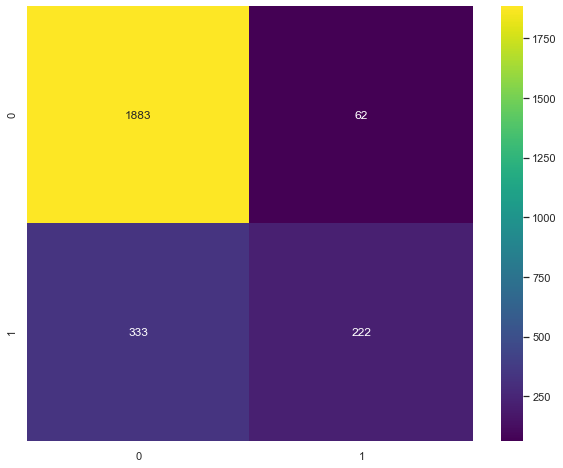

In [49]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=61, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesLayers.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesLayers.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
7500/7500 [==============================] - 3s 393us/step - loss: 0.4489 - accuracy: 0.8053
Epoch 2/10
7500/7500 [==============================] - 2s 288us/step - loss: 0.3786 - accuracy: 0.8315
Epoch 3/10
7500/7500 [==============================] - 2s 273us/step - loss: 0.3652 - accuracy: 0.8437
Epoch 4/10
7500/7500 [==============================] - 2s 277us/step - loss: 0.3568 - accuracy: 0.8413
Epoch 5/10
7500/7500 [==============================] - 2s 244us/step - loss: 0.3543 - accuracy: 0.8444
Epoch 6/10
7500/7500 [==============================] - 2s 233us/step - loss: 0.3494 - accuracy: 0.8468
Epoch 7/10
7500/7500 [==============================] - 2s 262us/step - loss: 0.3474 - accuracy: 0.8508
Epoch 8/10
7500/7500 [==============================] - 2s 253us/step - loss: 0.3447 - accuracy: 0.8528
Epoch 9/10
7500/7500 [==============================] - 2s 228us/step - loss: 0.3405 - accuracy: 0.8543
Epoch 10/10
7500/7500 [==============================] - 2s 227u

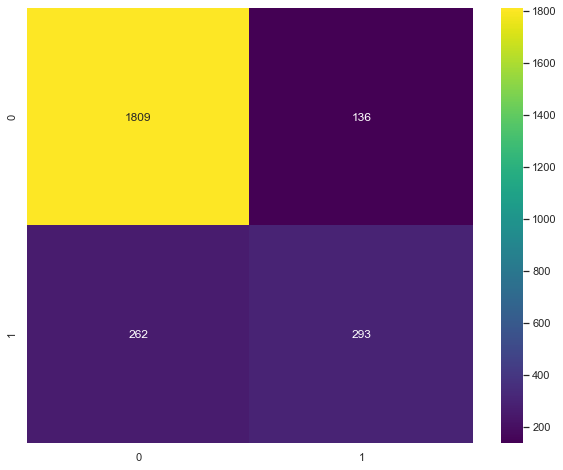

In [50]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=61, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesLayers.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesLayers.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
7500/7500 [==============================] - 2s 297us/step - loss: 0.4748 - accuracy: 0.7929
Epoch 2/10
7500/7500 [==============================] - 2s 283us/step - loss: 0.3890 - accuracy: 0.8328
Epoch 3/10
7500/7500 [==============================] - 2s 326us/step - loss: 0.3690 - accuracy: 0.8397
Epoch 4/10
7500/7500 [==============================] - 2s 327us/step - loss: 0.3636 - accuracy: 0.8452
Epoch 5/10
7500/7500 [==============================] - 2s 330us/step - loss: 0.3583 - accuracy: 0.8463
Epoch 6/10
7500/7500 [==============================] - 2s 326us/step - loss: 0.3526 - accuracy: 0.8497
Epoch 7/10
7500/7500 [==============================] - 2s 329us/step - loss: 0.3512 - accuracy: 0.8505
Epoch 8/10
7500/7500 [==============================] - 2s 329us/step - loss: 0.3467 - accuracy: 0.8524
Epoch 9/10
7500/7500 [==============================] - 2s 330us/step - loss: 0.3460 - accuracy: 0.8529
Epoch 10/10
7500/7500 [==============================] - 2s 330u

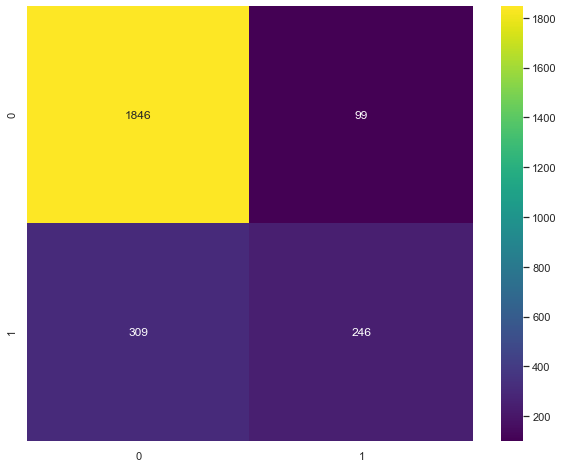

In [51]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=61, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesLayers.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesLayers.append(metrics.accuracy_score(y_train,y_predTrain))

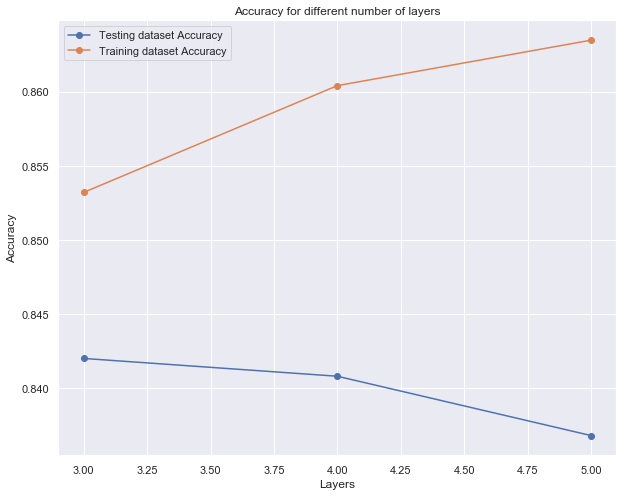

In [52]:
# Generate plot 
plt.plot([3, 4, 5], testValuesLayers, 'o-', label = 'Testing dataset Accuracy') 
plt.plot([3, 4, 5], trainValuesLayers, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Layers') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different number of layers")
plt.show() 

In [57]:
testValuesActivation = []
trainValuesActivation = []

Epoch 1/10
7500/7500 [==============================] - 3s 389us/step - loss: 0.4568 - accuracy: 0.8009
Epoch 2/10
7500/7500 [==============================] - 2s 294us/step - loss: 0.3796 - accuracy: 0.8357
Epoch 3/10
7500/7500 [==============================] - 2s 290us/step - loss: 0.3663 - accuracy: 0.8416
Epoch 4/10
7500/7500 [==============================] - 2s 293us/step - loss: 0.3570 - accuracy: 0.8473
Epoch 5/10
7500/7500 [==============================] - 2s 295us/step - loss: 0.3545 - accuracy: 0.8480
Epoch 6/10
7500/7500 [==============================] - 2s 293us/step - loss: 0.3507 - accuracy: 0.8503
Epoch 7/10
7500/7500 [==============================] - 2s 293us/step - loss: 0.3459 - accuracy: 0.8517
Epoch 8/10
7500/7500 [==============================] - 2s 293us/step - loss: 0.3427 - accuracy: 0.8523
Epoch 9/10
7500/7500 [==============================] - 2s 295us/step - loss: 0.3404 - accuracy: 0.8545
Epoch 10/10
7500/7500 [==============================] - 2s 293u

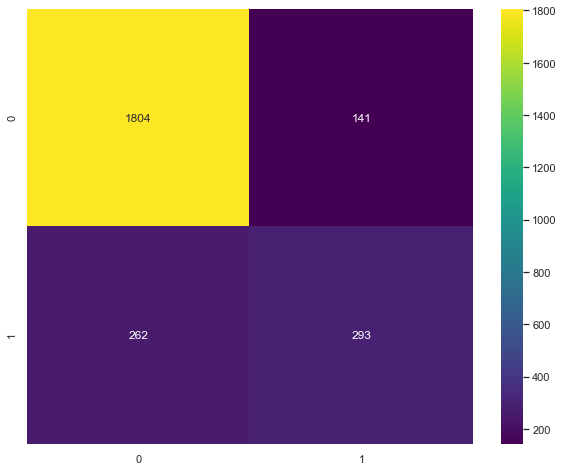

In [58]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=61, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesActivation.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesActivation.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
7500/7500 [==============================] - 3s 398us/step - loss: 0.4567 - accuracy: 0.8075
Epoch 2/10
7500/7500 [==============================] - 2s 312us/step - loss: 0.3846 - accuracy: 0.8328
Epoch 3/10
7500/7500 [==============================] - 2s 314us/step - loss: 0.3670 - accuracy: 0.8439
Epoch 4/10
7500/7500 [==============================] - 2s 295us/step - loss: 0.3613 - accuracy: 0.8436
Epoch 5/10
7500/7500 [==============================] - 2s 298us/step - loss: 0.3555 - accuracy: 0.8467
Epoch 6/10
7500/7500 [==============================] - 2s 329us/step - loss: 0.3495 - accuracy: 0.8493
Epoch 7/10
7500/7500 [==============================] - 2s 292us/step - loss: 0.3477 - accuracy: 0.8512
Epoch 8/10
7500/7500 [==============================] - 2s 305us/step - loss: 0.3410 - accuracy: 0.8547
Epoch 9/10
7500/7500 [==============================] - 2s 327us/step - loss: 0.3396 - accuracy: 0.8555
Epoch 10/10
7500/7500 [==============================] - 2s 315u

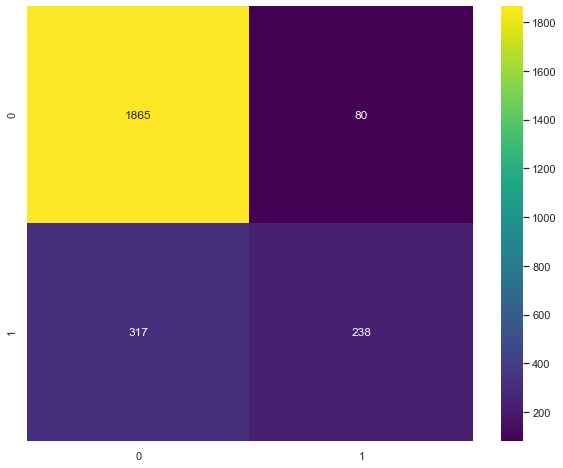

In [59]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=61, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesActivation.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesActivation.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
7500/7500 [==============================] - 3s 454us/step - loss: 0.5024 - accuracy: 0.7800
Epoch 2/10
7500/7500 [==============================] - 2s 308us/step - loss: 0.4175 - accuracy: 0.8188
Epoch 3/10
7500/7500 [==============================] - 2s 319us/step - loss: 0.3821 - accuracy: 0.8341
Epoch 4/10
7500/7500 [==============================] - 2s 297us/step - loss: 0.3680 - accuracy: 0.8431
Epoch 5/10
7500/7500 [==============================] - 2s 304us/step - loss: 0.3620 - accuracy: 0.8453
Epoch 6/10
7500/7500 [==============================] - 2s 311us/step - loss: 0.3602 - accuracy: 0.8460
Epoch 7/10
7500/7500 [==============================] - 2s 313us/step - loss: 0.3575 - accuracy: 0.8445
Epoch 8/10
7500/7500 [==============================] - 2s 300us/step - loss: 0.3547 - accuracy: 0.8467
Epoch 9/10
7500/7500 [==============================] - 2s 312us/step - loss: 0.3530 - accuracy: 0.8467
Epoch 10/10
7500/7500 [==============================] - 2s 303u

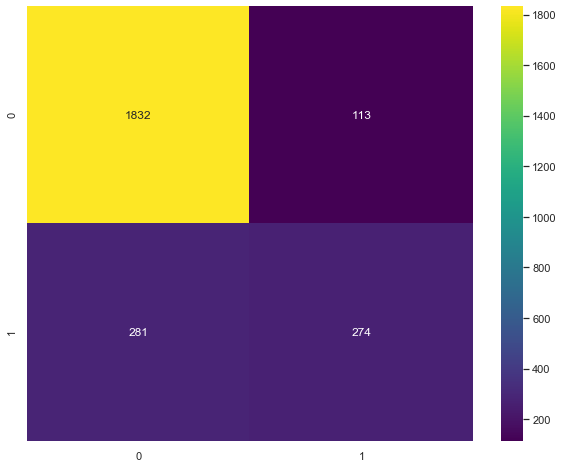

In [60]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=61, activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesActivation.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesActivation.append(metrics.accuracy_score(y_train,y_predTrain))

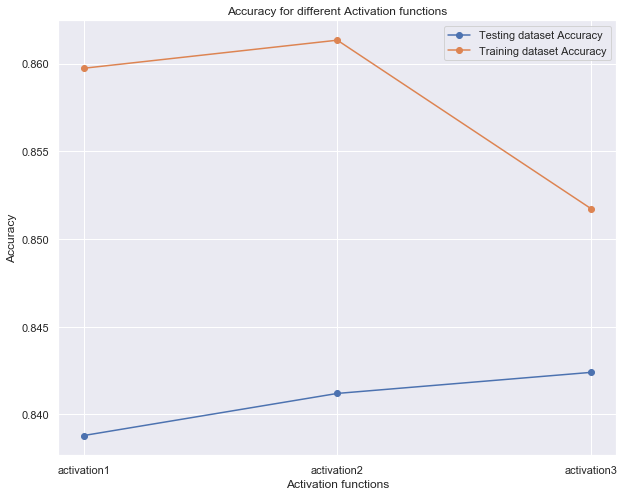

In [61]:
# Generate plot 
plt.plot(['activation1', 'activation2', 'activation3'], testValuesActivation, 'o-', label = 'Testing dataset Accuracy') 
plt.plot(['activation1', 'activation2', 'activation3'], trainValuesActivation, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Activation functions') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different Activation functions")
plt.show()

In [62]:
testValuesNodes = []
trainValuesNodes = []

Epoch 1/10
7500/7500 [==============================] - 3s 446us/step - loss: 0.5172 - accuracy: 0.7908
Epoch 2/10
7500/7500 [==============================] - 2s 313us/step - loss: 0.4454 - accuracy: 0.8107
Epoch 3/10
7500/7500 [==============================] - 2s 325us/step - loss: 0.4033 - accuracy: 0.8331
Epoch 4/10
7500/7500 [==============================] - 2s 296us/step - loss: 0.3825 - accuracy: 0.8399
Epoch 5/10
7500/7500 [==============================] - 2s 301us/step - loss: 0.3753 - accuracy: 0.8405
Epoch 6/10
7500/7500 [==============================] - 2s 301us/step - loss: 0.3698 - accuracy: 0.8436
Epoch 7/10
7500/7500 [==============================] - 2s 302us/step - loss: 0.3672 - accuracy: 0.8468
Epoch 8/10
7500/7500 [==============================] - 2s 316us/step - loss: 0.3649 - accuracy: 0.8480
Epoch 9/10
7500/7500 [==============================] - 2s 315us/step - loss: 0.3629 - accuracy: 0.8456
Epoch 10/10
7500/7500 [==============================] - 2s 304u

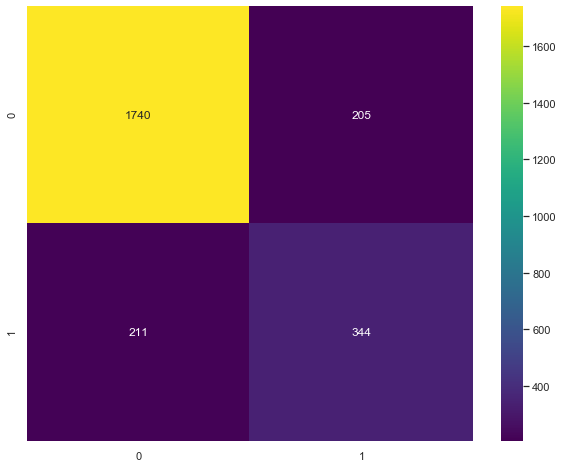

In [63]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=61, activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesNodes.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesNodes.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
7500/7500 [==============================] - 3s 419us/step - loss: 0.5045 - accuracy: 0.7717
Epoch 2/10
7500/7500 [==============================] - 2s 309us/step - loss: 0.4131 - accuracy: 0.8216
Epoch 3/10
7500/7500 [==============================] - 2s 313us/step - loss: 0.3793 - accuracy: 0.8368
Epoch 4/10
7500/7500 [==============================] - 2s 311us/step - loss: 0.3691 - accuracy: 0.8416
Epoch 5/10
7500/7500 [==============================] - 2s 313us/step - loss: 0.3644 - accuracy: 0.8452
Epoch 6/10
7500/7500 [==============================] - 2s 310us/step - loss: 0.3610 - accuracy: 0.8455
Epoch 7/10
7500/7500 [==============================] - 2s 309us/step - loss: 0.3586 - accuracy: 0.8488
Epoch 8/10
7500/7500 [==============================] - 2s 302us/step - loss: 0.3565 - accuracy: 0.8468
Epoch 9/10
7500/7500 [==============================] - 2s 311us/step - loss: 0.3556 - accuracy: 0.8479
Epoch 10/10
7500/7500 [==============================] - 2s 311u

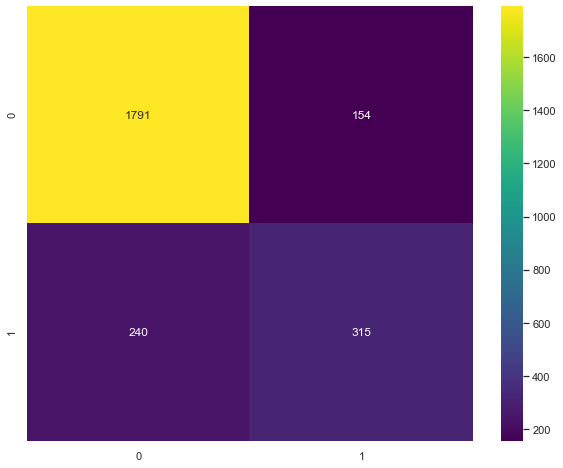

In [64]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=61, activation='tanh'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesNodes.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesNodes.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
7500/7500 [==============================] - 3s 427us/step - loss: 0.5161 - accuracy: 0.7936
Epoch 2/10
7500/7500 [==============================] - 2s 310us/step - loss: 0.4305 - accuracy: 0.7936
Epoch 3/10
7500/7500 [==============================] - 2s 315us/step - loss: 0.3987 - accuracy: 0.7936
Epoch 4/10
7500/7500 [==============================] - 2s 326us/step - loss: 0.3874 - accuracy: 0.7936
Epoch 5/10
7500/7500 [==============================] - 2s 312us/step - loss: 0.3808 - accuracy: 0.8188
Epoch 6/10
7500/7500 [==============================] - 2s 301us/step - loss: 0.3766 - accuracy: 0.8433
Epoch 7/10
7500/7500 [==============================] - 2s 309us/step - loss: 0.3730 - accuracy: 0.8445
Epoch 8/10
7500/7500 [==============================] - 2s 318us/step - loss: 0.3707 - accuracy: 0.8435
Epoch 9/10
7500/7500 [==============================] - 2s 310us/step - loss: 0.3683 - accuracy: 0.8445
Epoch 10/10
7500/7500 [==============================] - 2s 317u

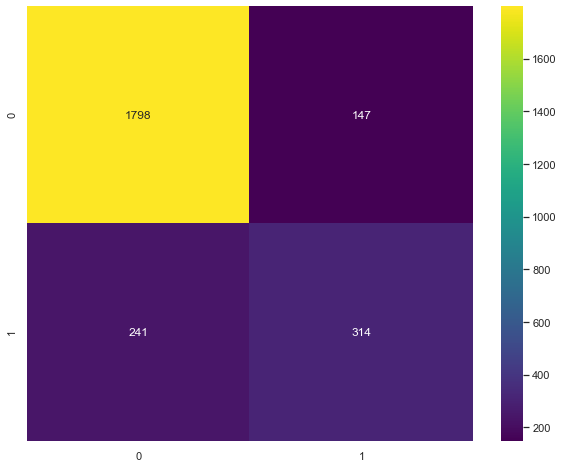

In [65]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=61, activation='tanh'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesNodes.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesNodes.append(metrics.accuracy_score(y_train,y_predTrain))

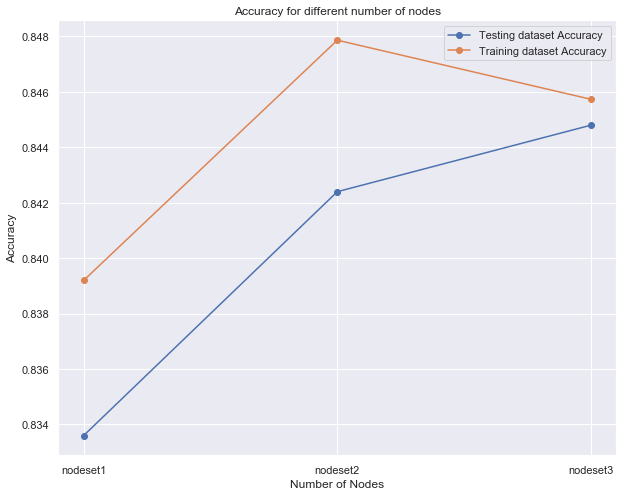

In [66]:
# Generate plot 
plt.plot(['nodeset1', 'nodeset2', 'nodeset3'], testValuesNodes, 'o-', label = 'Testing dataset Accuracy') 
plt.plot(['nodeset1', 'nodeset2', 'nodeset3'], trainValuesNodes, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Number of Nodes') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different number of nodes")
plt.show()